# Travel Salesman with 38 cities (Djibouti)

As a recall, your aim is to find the shortest path, so you visit all cities without visiting the same twice.

In [1]:
import tsplib95
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

In [15]:
from satsp import solver # Package for TSP using simulated annealing

from deap import base    # package that has genetic algorithm
from deap import creator
from deap import tools
from deap import algorithms

import random
import array

## Exploring the Data

In [3]:
problem = tsplib95.load('data/dj38.tsp')
print(problem.render())

NAME: dj38
COMMENT: requesting data sets without duplications.
TYPE: TSP
DIMENSION: 38
EDGE_WEIGHT_TYPE: EUC_2D
NODE_COORD_SECTION:
1 11003.6111 42102.5
2 11108.6111 42373.8889
3 11133.3333 42885.8333
4 11155.8333 42712.5
5 11183.3333 42933.3333
6 11297.5 42853.3333
7 11310.2778 42929.4444
8 11416.6667 42983.3333
9 11423.8889 43000.2778
10 11438.3333 42057.2222
11 11461.1111 43252.7778
12 11485.5556 43187.2222
13 11503.0556 42855.2778
14 11511.3889 42106.3889
15 11522.2222 42841.9444
16 11569.4444 43136.6667
17 11583.3333 43150.0
18 11595.0 43148.0556
19 11600.0 43150.0
20 11690.5556 42686.6667
21 11715.8333 41836.1111
22 11751.1111 42814.4444
23 11770.2778 42651.9444
24 11785.2778 42884.4444
25 11822.7778 42673.6111
26 11846.9444 42660.5556
27 11963.0556 43290.5556
28 11973.0556 43026.1111
29 12058.3333 42195.5556
30 12149.4444 42477.5
31 12286.9444 43355.5556
32 12300.0 42433.3333
33 12355.8333 43156.3889
34 12363.3333 43189.1667
35 12372.7778 42711.3889
36 12386.6667 43334.7222
37 1

In [4]:
problem.keywords_by_name

{'name': 'NAME',
 'comment': 'COMMENT',
 'type': 'TYPE',
 'dimension': 'DIMENSION',
 'capacity': 'CAPACITY',
 'node_coord_type': 'NODE_COORD_TYPE',
 'edge_weight_type': 'EDGE_WEIGHT_TYPE',
 'display_data_type': 'DISPLAY_DATA_TYPE',
 'edge_weight_format': 'EDGE_WEIGHT_FORMAT',
 'edge_data_format': 'EDGE_DATA_FORMAT',
 'node_coords': 'NODE_COORD_SECTION',
 'edge_data': 'EDGE_DATA_SECTION',
 'edge_weights': 'EDGE_WEIGHT_SECTION',
 'display_data': 'DISPLAY_DATA_SECTION',
 'fixed_edges': 'FIXED_EDGES_SECTION',
 'depots': 'DEPOT_SECTION',
 'demands': 'DEMAND_SECTION',
 'tours': 'TOUR_SECTION'}

In [5]:
print('problem: ', problem.name)
print('dimension:', problem.dimension)
N_POINTS = problem.dimension

problem:  dj38
dimension: 38


In [6]:
positions = problem.node_coords
positions

{1: [11003.6111, 42102.5],
 2: [11108.6111, 42373.8889],
 3: [11133.3333, 42885.8333],
 4: [11155.8333, 42712.5],
 5: [11183.3333, 42933.3333],
 6: [11297.5, 42853.3333],
 7: [11310.2778, 42929.4444],
 8: [11416.6667, 42983.3333],
 9: [11423.8889, 43000.2778],
 10: [11438.3333, 42057.2222],
 11: [11461.1111, 43252.7778],
 12: [11485.5556, 43187.2222],
 13: [11503.0556, 42855.2778],
 14: [11511.3889, 42106.3889],
 15: [11522.2222, 42841.9444],
 16: [11569.4444, 43136.6667],
 17: [11583.3333, 43150.0],
 18: [11595.0, 43148.0556],
 19: [11600.0, 43150.0],
 20: [11690.5556, 42686.6667],
 21: [11715.8333, 41836.1111],
 22: [11751.1111, 42814.4444],
 23: [11770.2778, 42651.9444],
 24: [11785.2778, 42884.4444],
 25: [11822.7778, 42673.6111],
 26: [11846.9444, 42660.5556],
 27: [11963.0556, 43290.5556],
 28: [11973.0556, 43026.1111],
 29: [12058.3333, 42195.5556],
 30: [12149.4444, 42477.5],
 31: [12286.9444, 43355.5556],
 32: [12300.0, 42433.3333],
 33: [12355.8333, 43156.3889],
 34: [12363.3

In [7]:
cities = list(problem.get_nodes())
coordinates = np.array([problem.node_coords[city] for city in cities])

(-0.5, 350.5, 376.5, -0.5)

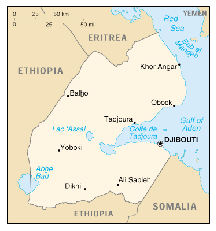

In [8]:
image = plt.imread('data/djmap.jpg')
plt.imshow(image)
plt.axis('off')

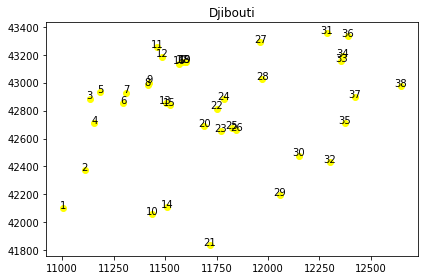

In [9]:
plt.title('Djibouti')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='yellow')
for city, x,y in zip(cities, coordinates[:,0],coordinates[:,1]):

    label = city

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.show()

### Calculating distances

In [10]:
edge = 3, 8
weight = problem.get_weight(*edge)
print(f'The driving distance from node {edge[0]} to node {edge[1]} is {weight}.')

The driving distance from node 3 to node 8 is 300.


In [11]:
distances_matrix = np.zeros((problem.dimension, problem.dimension))
for row in range(0,38):
    for col in range(0,38):
        if row == col:
            distances_matrix[row, col] = 1e50 # not moving isn't a possibility!
        else:    
            distances_matrix[row, col] = problem.get_weight(row+1, col+1)
distances_matrix

array([[1.000e+50, 2.910e+02, 7.940e+02, ..., 1.852e+03, 1.625e+03,
        1.858e+03],
       [2.910e+02, 1.000e+50, 5.130e+02, ..., 1.599e+03, 1.413e+03,
        1.649e+03],
       [7.940e+02, 5.130e+02, 1.000e+50, ..., 1.331e+03, 1.288e+03,
        1.514e+03],
       ...,
       [1.852e+03, 1.599e+03, 1.331e+03, ..., 1.000e+50, 4.410e+02,
        4.440e+02],
       [1.625e+03, 1.413e+03, 1.288e+03, ..., 4.410e+02, 1.000e+50,
        2.360e+02],
       [1.858e+03, 1.649e+03, 1.514e+03, ..., 4.440e+02, 2.360e+02,
        1.000e+50]])

### Calculating the distance of a given route

In [12]:
z = np.arange(0,38)
route = np.array((z[:-1],z[1:])).T
sum(distances_matrix[route[:,0], route[:,1]])

15240.0

<div class="alert alert-success" role="alert">
    <h1>Simulated Annealing (SA)</h1>
</div>

This is a TSP with a small number of cities, in this case we are going to use simulated annealing to explore the combinations. The initial temperature will be set to a high value to accept at the begining moves that are not so good, but that in the end can imply on the best route. The range to the final temperature will not be huge to keep throughout the evolution of the algorithm diversity. 

In [17]:
cities_matrix = np.array([cities, coordinates[:,0],coordinates[:,1]]).T.reshape(-1,3)


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6660.0


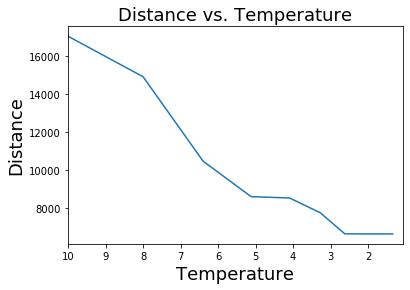

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 22.0, 26.0, 25.0, 23.0, 20.0, 15.0, 13.0, 16.0, 18.0, 19.0, 17.0, 11.0, 12.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


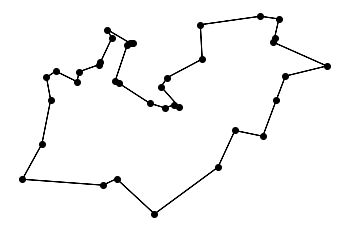


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7131.0


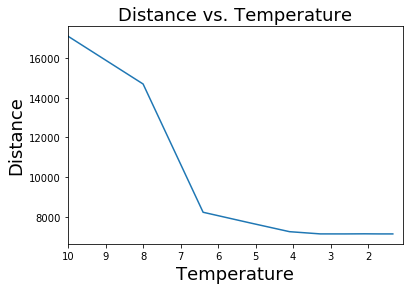

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 11.0, 17.0, 19.0, 18.0, 16.0, 13.0, 15.0, 20.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 23.0, 29.0, 21.0, 14.0, 10.0]


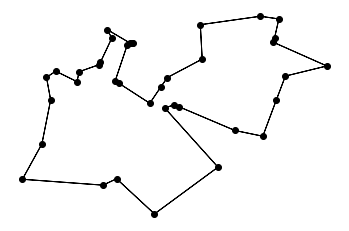


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6854.0


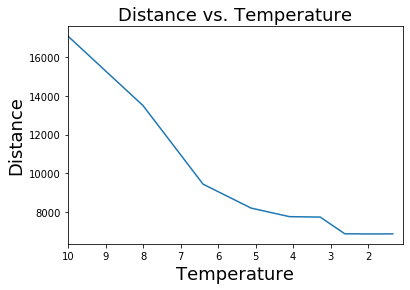

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 15.0, 13.0, 8.0, 9.0, 12.0, 11.0, 16.0, 17.0, 18.0, 19.0, 22.0, 20.0, 23.0, 25.0, 26.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 29.0, 21.0, 14.0, 10.0]


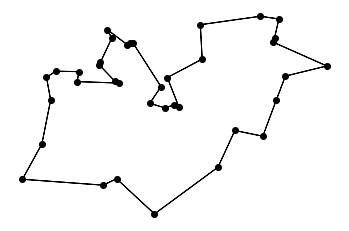


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7524.0


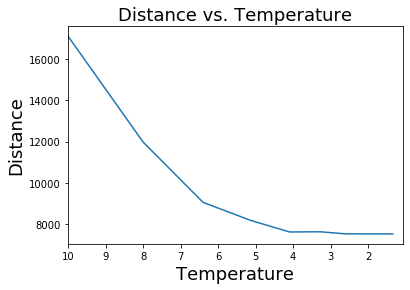

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 11.0, 16.0, 17.0, 18.0, 19.0, 27.0, 28.0, 33.0, 34.0, 31.0, 36.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 22.0, 24.0, 13.0, 15.0, 20.0, 23.0, 29.0, 21.0, 14.0, 10.0]


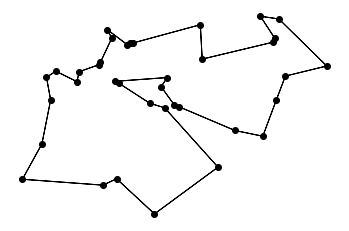


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6656.0


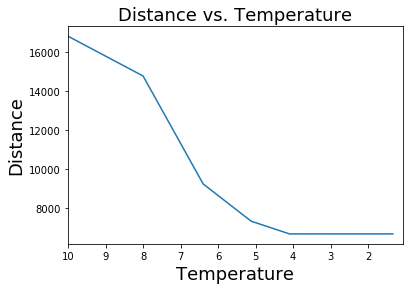

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 11.0, 17.0, 19.0, 18.0, 16.0, 13.0, 15.0, 20.0, 23.0, 26.0, 25.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 29.0, 21.0, 14.0, 10.0]


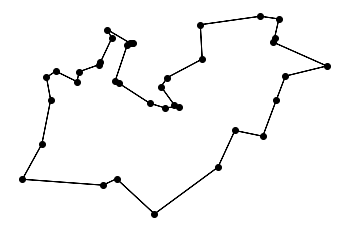


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7130.0


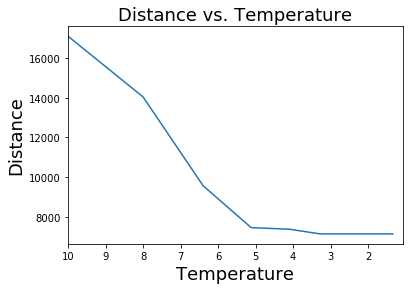

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 11.0, 19.0, 18.0, 17.0, 16.0, 13.0, 15.0, 20.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 23.0, 29.0, 21.0, 14.0, 10.0]


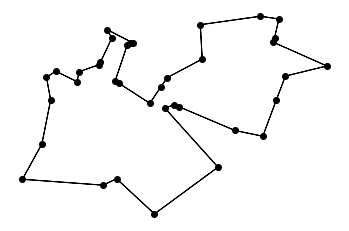


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7311.0


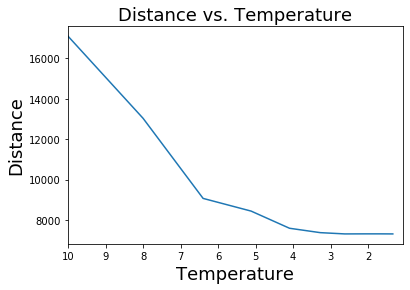

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 26.0, 25.0, 22.0, 20.0, 23.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 13.0, 15.0, 6.0, 7.0, 5.0, 3.0, 4.0, 2.0]


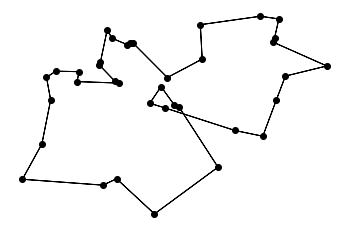


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7075.0


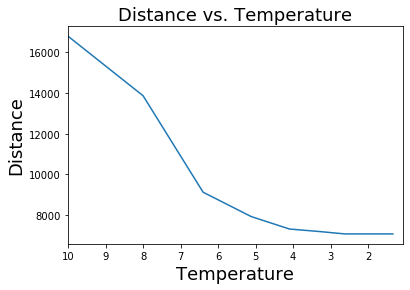

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 15.0, 13.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 28.0, 24.0, 22.0, 20.0, 23.0, 25.0, 26.0, 30.0, 32.0, 29.0, 21.0, 14.0, 10.0]


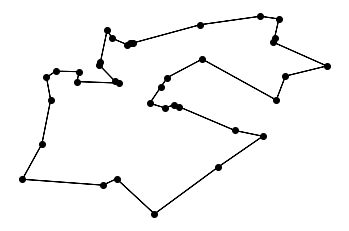


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6891.0


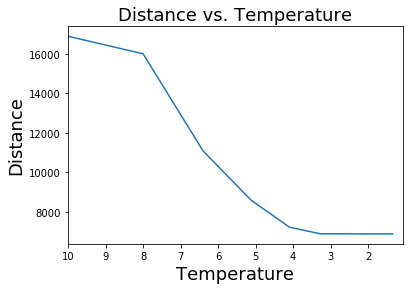

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 13.0, 15.0, 20.0, 23.0, 26.0, 25.0, 22.0, 24.0, 16.0, 12.0, 11.0, 17.0, 18.0, 19.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 29.0, 21.0, 14.0, 10.0]


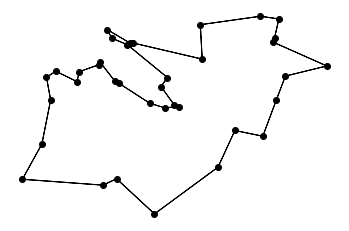


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7453.0


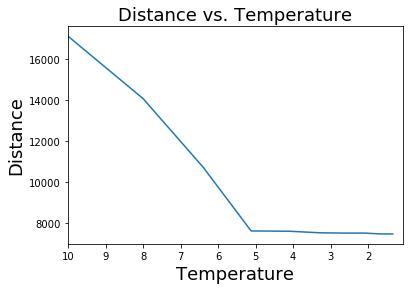

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 23.0, 20.0, 22.0, 24.0, 25.0, 26.0, 30.0, 32.0, 35.0, 37.0, 38.0, 36.0, 31.0, 34.0, 33.0, 28.0, 27.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 15.0, 13.0, 6.0, 7.0, 5.0, 3.0, 4.0, 2.0]


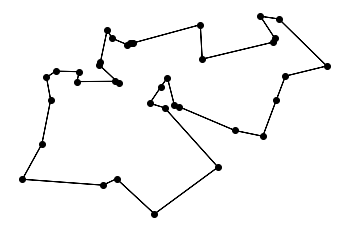


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7177.0


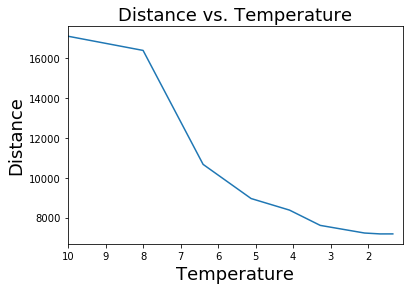

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 23.0, 25.0, 26.0, 30.0, 32.0, 35.0, 37.0, 38.0, 34.0, 33.0, 36.0, 31.0, 27.0, 28.0, 24.0, 22.0, 20.0, 15.0, 13.0, 16.0, 19.0, 18.0, 17.0, 11.0, 12.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


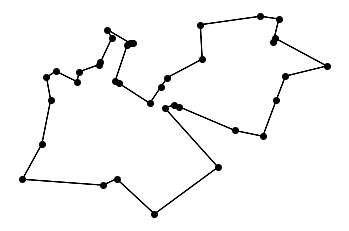


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7212.0


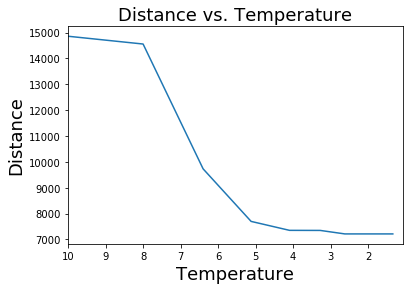

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 32.0, 30.0, 26.0, 25.0, 23.0, 20.0, 22.0, 24.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 13.0, 15.0, 6.0, 7.0, 5.0, 3.0, 4.0, 2.0]


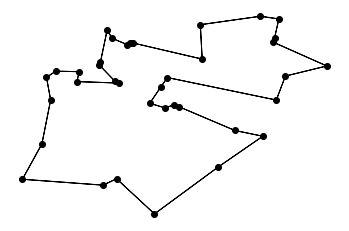


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7181.0


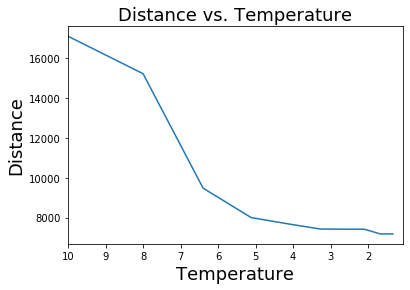

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 11.0, 12.0, 17.0, 19.0, 18.0, 16.0, 9.0, 8.0, 13.0, 15.0, 20.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 23.0, 29.0, 21.0, 14.0, 10.0]


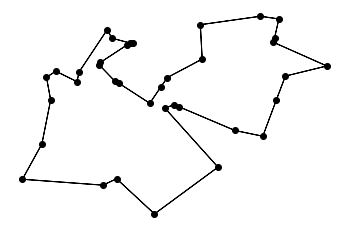


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7521.0


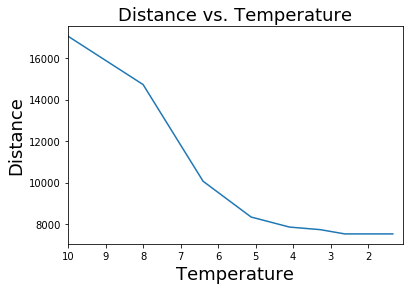

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 23.0, 20.0, 15.0, 13.0, 24.0, 22.0, 25.0, 26.0, 30.0, 32.0, 35.0, 37.0, 38.0, 36.0, 31.0, 34.0, 33.0, 28.0, 27.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


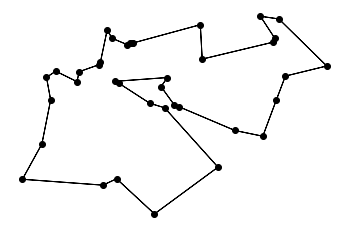


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7967.0


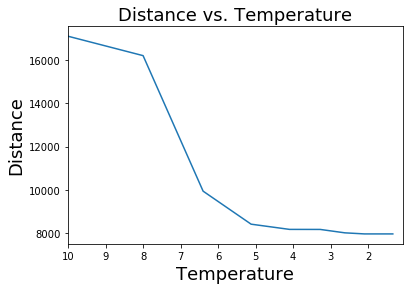

Best TSP tour:  [1.0, 2.0, 20.0, 23.0, 22.0, 24.0, 15.0, 13.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 27.0, 28.0, 33.0, 34.0, 31.0, 36.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 29.0, 21.0, 14.0, 10.0]


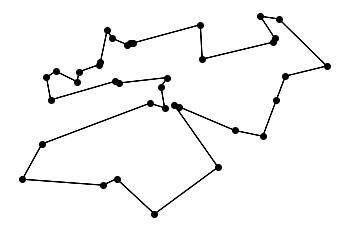


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7259.0


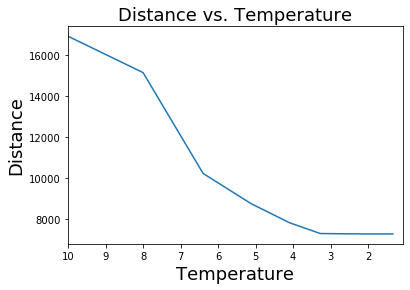

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 15.0, 13.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 24.0, 22.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 23.0, 20.0, 29.0, 21.0, 14.0, 10.0]


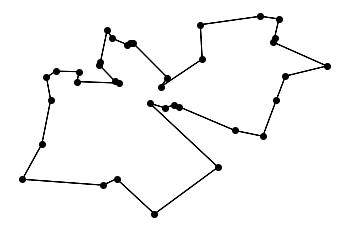


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6656.0


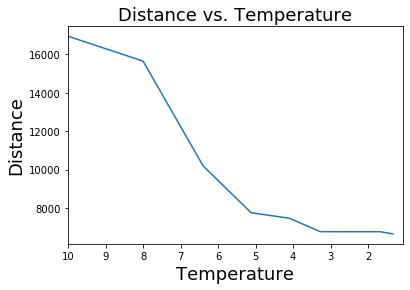

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 22.0, 25.0, 26.0, 23.0, 20.0, 15.0, 13.0, 16.0, 17.0, 18.0, 19.0, 11.0, 12.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


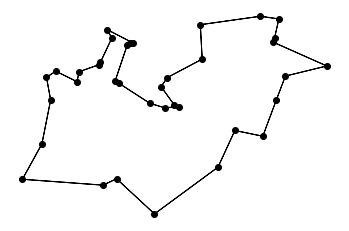


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6965.0


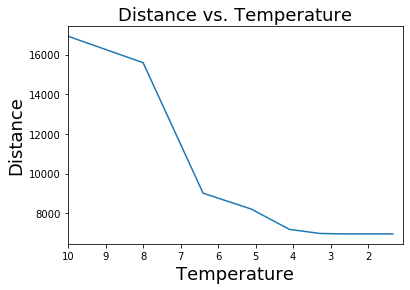

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 13.0, 15.0, 20.0, 23.0, 26.0, 25.0, 22.0, 24.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 29.0, 21.0, 14.0, 10.0]


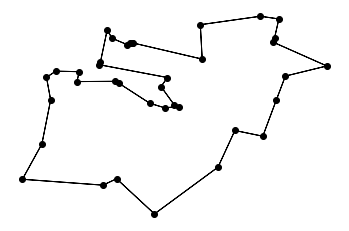


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7277.0


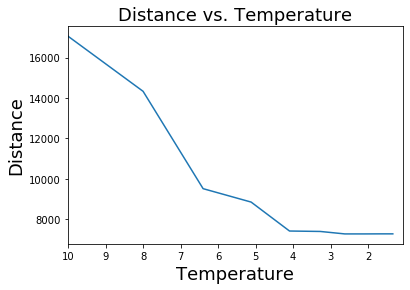

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 13.0, 15.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 22.0, 20.0, 23.0, 29.0, 21.0, 14.0, 10.0]


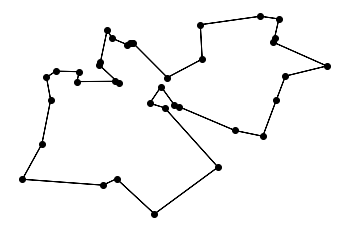


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  6660.0


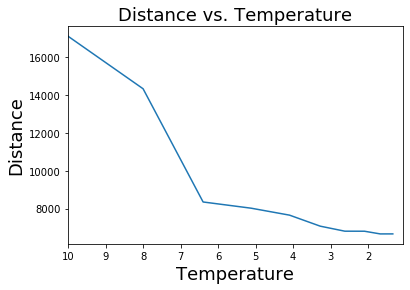

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 19.0, 18.0, 17.0, 16.0, 13.0, 15.0, 20.0, 23.0, 25.0, 26.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 29.0, 21.0, 14.0, 10.0]


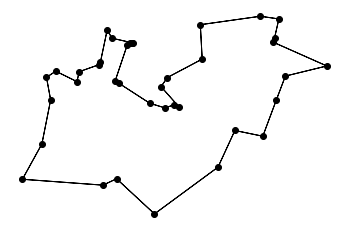


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7130.0


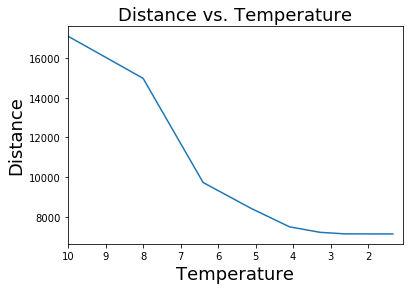

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 23.0, 25.0, 26.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 22.0, 20.0, 15.0, 13.0, 16.0, 17.0, 18.0, 19.0, 11.0, 12.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


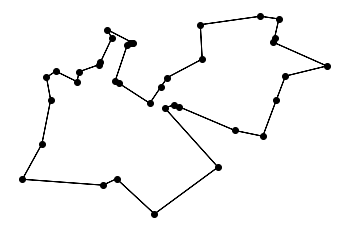


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7247.0


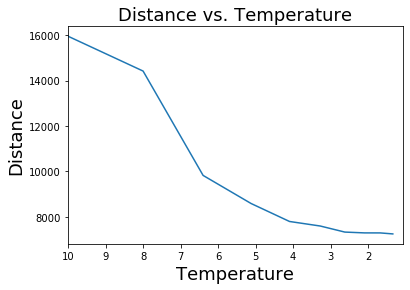

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 15.0, 13.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 28.0, 24.0, 22.0, 20.0, 23.0, 25.0, 26.0, 29.0, 21.0, 14.0, 10.0]


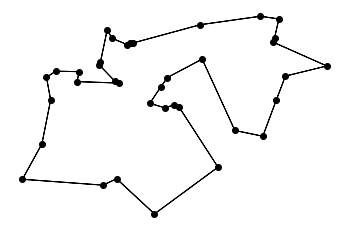


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7156.0


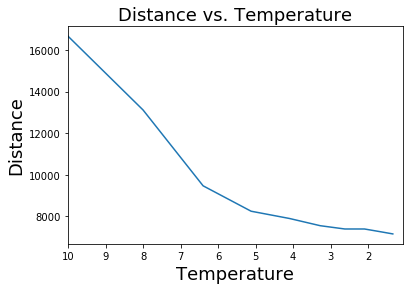

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 20.0, 23.0, 25.0, 26.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 22.0, 15.0, 13.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 2.0]


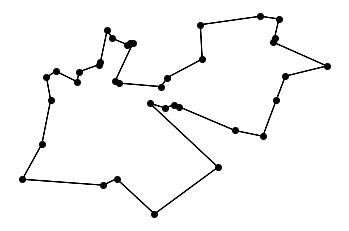


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7292.0


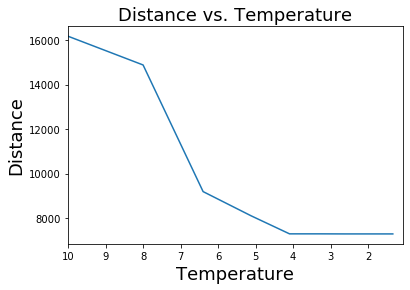

Best TSP tour:  [1.0, 10.0, 14.0, 21.0, 29.0, 30.0, 32.0, 35.0, 37.0, 38.0, 33.0, 34.0, 36.0, 31.0, 27.0, 28.0, 24.0, 19.0, 18.0, 17.0, 16.0, 12.0, 11.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3.0, 4.0, 13.0, 15.0, 22.0, 25.0, 26.0, 23.0, 20.0, 2.0]


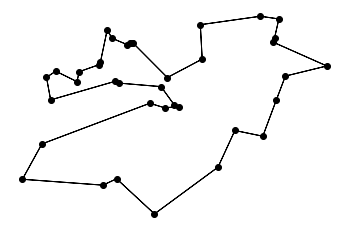


Simulated Annealing terminated after 10 epochs.
Best TSP tour length:  7231.0


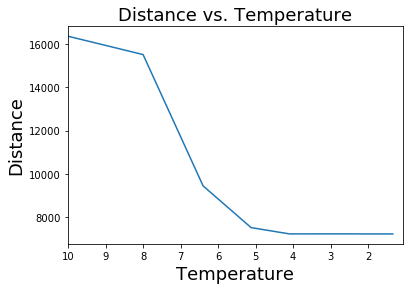

Best TSP tour:  [1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 6.0, 15.0, 13.0, 8.0, 9.0, 11.0, 12.0, 16.0, 17.0, 18.0, 19.0, 22.0, 24.0, 28.0, 27.0, 31.0, 36.0, 34.0, 33.0, 38.0, 37.0, 35.0, 32.0, 30.0, 26.0, 25.0, 23.0, 20.0, 29.0, 21.0, 14.0, 10.0]


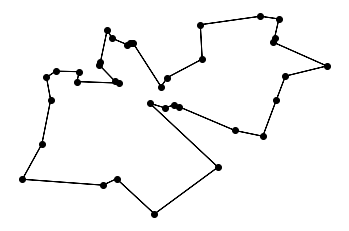

Wall time: 32.4 s


In [173]:
%%time
for i in range(25):
    solver.Solve(city_list = cities_matrix, dist_matrix = distances_matrix, start_temp = 10, \
              stop_temp = 1e-2, alpha = .8, epochs = 10, epoch_length = 5, \
              epoch_length_factor = 10, stopping_count = 1e50, screen_output = False)
    solver.PrintSolution()